In [1]:
import os, sys
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.DataFrame({
    'Country': ['Taiwan','Australia','Ireland','Australia','Ireland','Taiwan'],
    'Age': [25,30,45,35,22,36],
    'Salary': [20000,32000,59000,60000,43000,52000]
})
display(df)

,Country,Age,Salary
0,Taiwan,25,20000
1,Australia,30,32000
2,Ireland,45,59000
3,Australia,35,60000
4,Ireland,22,43000
5,Taiwan,36,52000


In [3]:
# Calculate mean value based on country filed

# Method 1: use groupby 
features = ['Country']
res = df.groupby(features).mean().round(3)
display(res)

# method 2: use pivot_table
res = pd.pivot_table(df, index=features, aggfunc='mean')
display(res)

,Age,Salary
Country,,
Australia,32.5,46000.0
Ireland,33.5,51000.0
Taiwan,30.5,36000.0


,Age,Salary
Country,,
Australia,32.5,46000
Ireland,33.5,51000
Taiwan,30.5,36000


In [8]:
from IPython.display import display_html

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline;margin:10px"'), raw=True)
    return

# Use crosstab
kwargs = { 'margins': True, 'margins_name': 'Total' }
res1 = pd.crosstab(df.Country, df.Age, **kwargs)
# display(res1)

# Use groupby
features = ['Country', 'Age']
res2 = df.groupby(features)['Country'].count().unstack().fillna(0).astype(int)
res2['Total'] = res2.sum(axis=1)
res2.loc['Total'] = res2.sum(axis=0)
# display(res2)

# Use pivot_table
columns = df.Age.unique()

res3 = df.pivot_table(
    values='Age', 
    index='Country', 
    columns=columns, 
    aggfunc=len
).fillna(0).astype(int)

res3['Total'] = res3.sum(axis=1)
res3.loc['Total'] = res3.sum(axis=0)
# display(res3)

display_side_by_side(res1, res2, res3)

Age,22,25,30,35,36,45,Total
Country,,,,,,,
Australia,0,0,1,1,0,0,2
Ireland,1,0,0,0,0,1,2
Taiwan,0,1,0,0,1,0,2
Total,1,1,1,1,1,1,6
Age,22,25,30,35,36,45,Total
Country,,,,,,,
Australia,0,0,1,1,0,0,2
Ireland,1,0,0,0,0,1,2
Taiwan,0,1,0,0,1,0,2


Salary         20000  32000  43000  52000  59000  60000
Country   Age                                          
Australia 30     0.0    1.0    0.0    0.0    0.0    0.0
          35     0.0    0.0    0.0    0.0    0.0    1.0
Ireland   22     0.0    0.0    1.0    0.0    0.0    0.0
          45     0.0    0.0    0.0    0.0    1.0    0.0
Taiwan    25     1.0    0.0    0.0    0.0    0.0    0.0
          36     0.0    0.0    0.0    1.0    0.0    0.0

<AxesSubplot:xlabel='Salary', ylabel='Country-Age'>

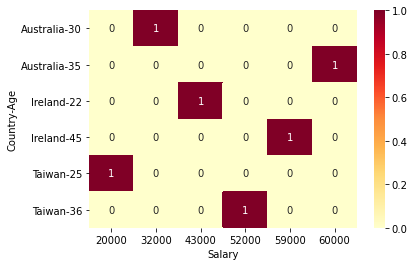

In [5]:
import seaborn as sns

res = pd.crosstab([df.Country, df.Age], df.Salary, normalize=1)
display(res)

fig = sns.heatmap(res, cmap='YlOrRd', annot=True)
display(fig)